In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from dataset import generate_multicollinear_dataset

https://scikit-learn.org/stable/modules/linear_model.html

`generate_multicollinear_datasets` generates a dataset and target with collinear input features.

The input dataset consists of two parts: 1) collinear signal features with added noise, and 2) completely random noise features.
    
The target is the sum of the noise-free signals.

In [2]:
X, y = generate_multicollinear_dataset(n_features=3, n_noise_features = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
X

,x0,x1,x2,noise0
0,-0.082978,-0.173355,0.450176,3.118587
1,1.220324,1.027058,1.056653,3.749616
2,1.500114,2.385942,2.415606,1.884133
3,2.802333,2.857270,3.141566,0.694944
4,3.646756,4.408535,3.890008,-3.390286
...,...,...,...,...
95,94.737027,95.431972,94.568209,3.438404
96,96.403380,95.513952,95.877924,-1.189839
97,97.073679,96.734362,96.579626,2.498583
98,97.502870,98.116778,98.482817,0.111415


x0


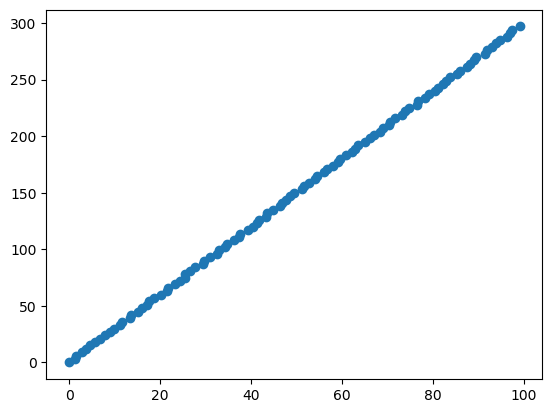

x1


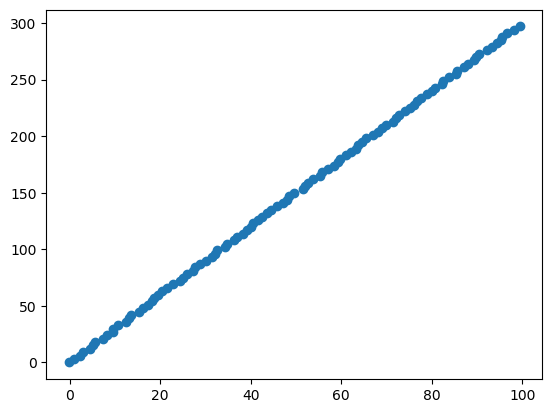

x2


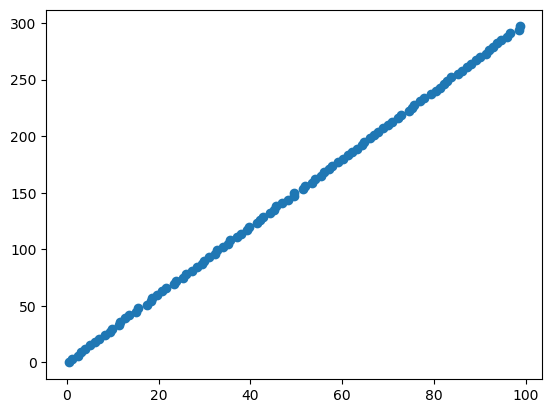

noise0


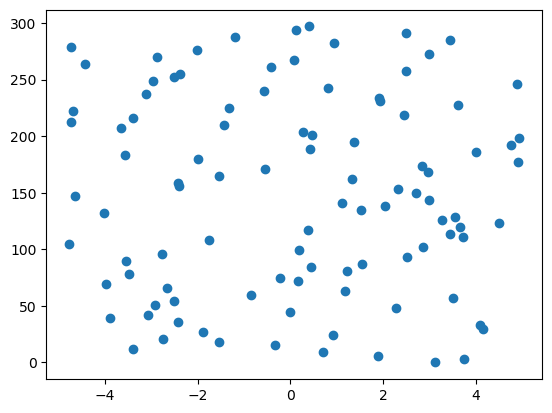

In [4]:
for col in X.columns:
    print(col)
    plt.scatter(X[col], y)
    plt.show()

### With collinear features, the linear regression model gets confused, and the coefficients can vary from their "true" values.

[ 0.97555765  0.87272824  1.15042547 -0.01299905]


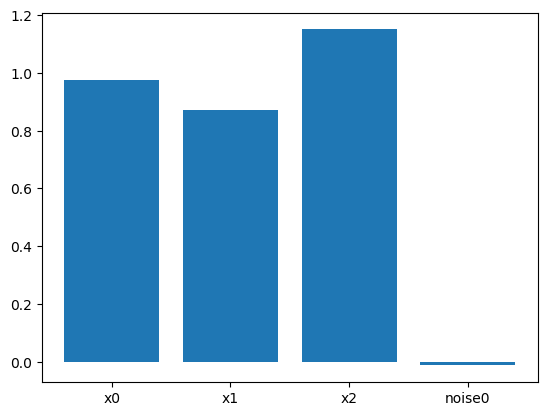

In [5]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

# L1: LASSO Regression

* LASSO regression, like linear regression, minimizes the sum of the squared errors.

* However, LASSO regression also adds a penalty factor.

* The penalty factor is the sum of the absolute values of the coefficients.

* This is also called L1 regularization.

### In LASSO regression, the coefficients of features that don't contribute predictive power can go to zero.


[ 1.68449945  0.98505789  0.32728077 -0.        ]


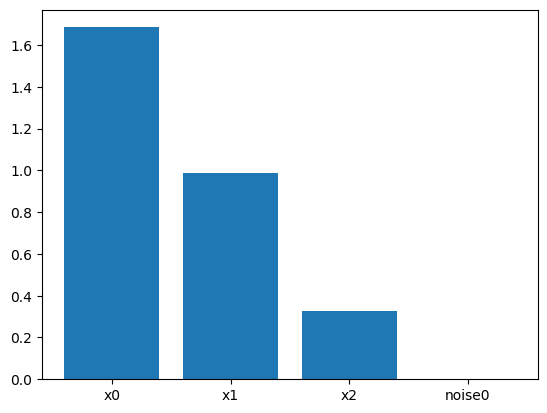

In [6]:
# Note that the coefficients for the noise features are zero, 
# but LASSO regression is still confused by the collinear features.
reg = Lasso(max_iter=10000).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

# L2: Ridge Regression

* Ridge regression is similar to LASSO regression.

* Both Ridge regression and LASSO regression add a penalty factor.

* The penalty factor in Ridge regression is the sum of the squared values of the coefficients.

* This is called L2 regularization.

## In Ridge regression, the coefficients can't go to zero. But, this type of regression doesn't get as confused by collinear features, and the coefficients are more stable.

[ 0.99837241  0.99067398  1.00802477 -0.01171791]


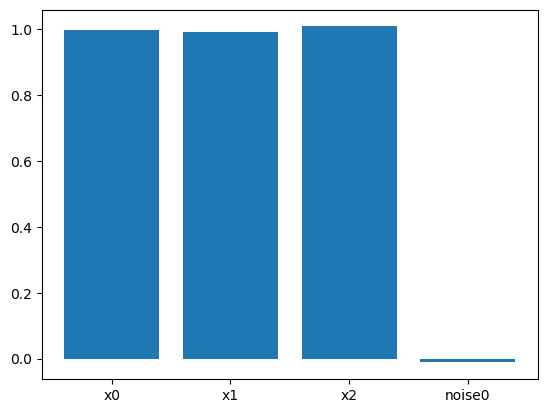

In [7]:
reg = Ridge(alpha=100).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

# ElasticNet

* ElasticNet regression is a hybrid of the LASSO and Ridge regressions.

* ElasticNet has L1 and L2 regularization (that is, it uses both penalties).

## The noise coefficients without predictive power go to zero, and the collinear features have coefficients that are more stable.

[ 0.98556992  0.99959515  1.00170884 -0.        ]


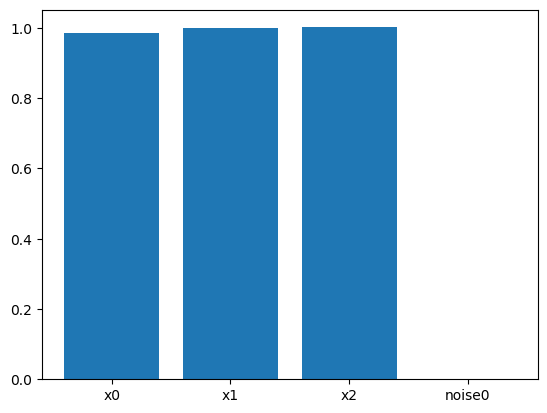

In [8]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=10).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()